In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

In [78]:
df = pd.read_csv('Salary_Data.csv')

## Exploring the Data

#### taking a look at teh data

In [79]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### some description of the data

In [80]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### Correltation between the data

In [81]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


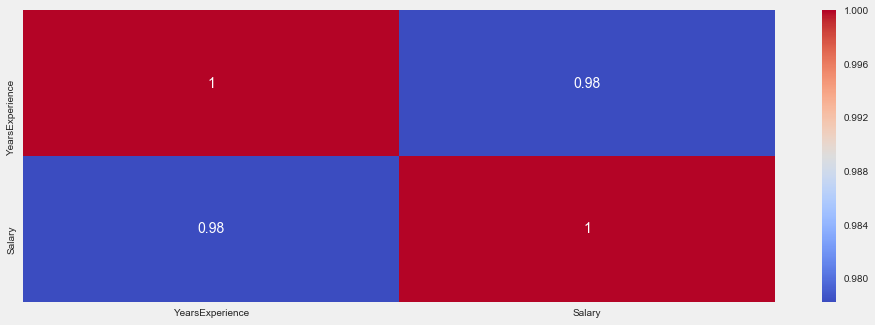

In [82]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## Pre Processing

In [91]:
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

#### Dealing with missing data

In [84]:
# replacing missing data with he mean of the colum
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
# select the misssing data columns to fit
imputer = imputer.fit(X)
X = imputer.transform(X)

## Model and Training

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

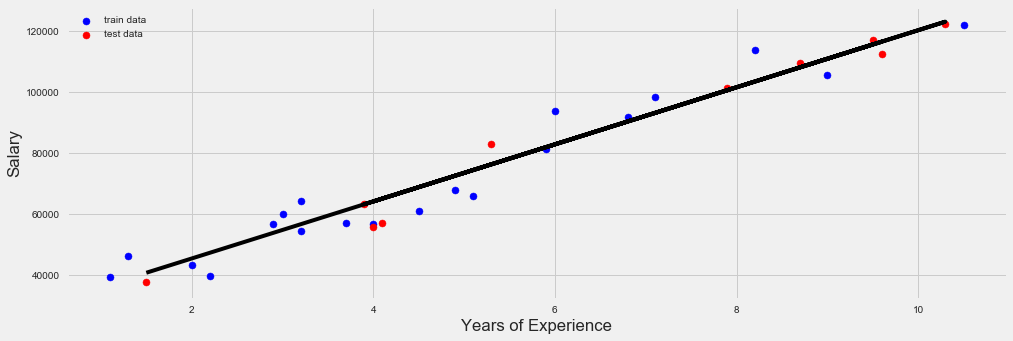

In [88]:
plt.clf()
plt.scatter(X_train, y_train, color="b", label="train data")
plt.scatter(X_test, y_test, color="r", label="test data")
plt.plot(X_test, model.predict(X_test), color="black")
plt.legend(loc=2)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

## Predicting/ Slope / Intecept / Score (r^2)

In [106]:
for i,years in enumerate(X) :
    pred = model.predict(years)[0][0]
    real = y[i][0]
    diff =  real - pred
    percent = real / pred
    print("Predict Salary for " + str(years[0]) + " years of experience is be ${0:.2f}".format(pred) )
    print("Real Salary for " + str(years[0]) + " years of experience is be ${0:.2f}".format(real) )
    print("Difference of ${0:.2f}".format(diff) + " ->  {0:.2f}".format(percent) + " %" )
    print("")

print("Slope: ${0:.2f}".format(model.coef_[0][0]))
print("Intercept: ${0:.2f}".format( model.intercept_[0]))
print("Test Score (r^2): {0:.2f}".format(model.score(X_test, y_test)))
print("Training Score (r^2): {0:.2f}".format(model.score(X_train, y_train)))
print("\n\n\n\n\n\n")

Predict Salary for 1.1 years of experience is be $37096.73
Real Salary for 1.1 years of experience is be $39343.00
Difference of $2246.27 ->  1.06 %

Predict Salary for 1.3 years of experience is be $38965.92
Real Salary for 1.3 years of experience is be $46205.00
Difference of $7239.08 ->  1.19 %

Predict Salary for 1.5 years of experience is be $40835.11
Real Salary for 1.5 years of experience is be $37731.00
Difference of $-3104.11 ->  0.92 %

Predict Salary for 2.0 years of experience is be $45508.08
Real Salary for 2.0 years of experience is be $43525.00
Difference of $-1983.08 ->  0.96 %

Predict Salary for 2.2 years of experience is be $47377.27
Real Salary for 2.2 years of experience is be $39891.00
Difference of $-7486.27 ->  0.84 %

Predict Salary for 2.9 years of experience is be $53919.43
Real Salary for 2.9 years of experience is be $56642.00
Difference of $2722.57 ->  1.05 %

Predict Salary for 3.0 years of experience is be $54854.02
Real Salary for 3.0 years of experienc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarn